In [116]:
import pandas as pd
import numpy as np

In [117]:
from google.colab import files
df = files.upload()

Saving FA1 Scenario Dataset - Rolling Stock Fleet.csv to FA1 Scenario Dataset - Rolling Stock Fleet (1).csv


In [118]:
df = pd.read_csv("FA1 Scenario Dataset - Rolling Stock Fleet.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Equipment Number           1185 non-null   object 
 1   Equipment Class            1185 non-null   object 
 2   Equipment Category         1185 non-null   object 
 3   Service Group              1185 non-null   object 
 4   Department                 1185 non-null   object 
 5   Make                       1185 non-null   object 
 6   Model                      1185 non-null   object 
 7   Year                       1185 non-null   int64  
 8   Site                       1185 non-null   object 
 9   Mileage2024 (km)           853 non-null    float64
 10  HourMeter2024 (hours)      360 non-null    float64
 11  DowntimeHours2024 (hours)  1081 non-null   float64
 12  LaborHours2024 (hours)     1081 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage:

In [119]:
df.rename(columns ={"Equipment Number ": "Equipment Number"}, inplace=True)

In [120]:
df.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours)
0,A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251
1,A0128,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING SEWERS OPER.,FORD,FOCUS,2002,MANITOBA YD. (250 W. 70TH),1607.0,NaN,29.510834,4.07029
2,A0129,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING SANITATION OPER.,MERCEDES,SMARTC,2008,MANITOBA YD. (250 W. 70TH),1323.0,NaN,4.696111,3.21806
3,A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750
4,A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277


In [121]:
df = df.set_index("Equipment Number")
df.head()

,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours)
Equipment Number,,,,,,,,,,,,
A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251
A0128,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING SEWERS OPER.,FORD,FOCUS,2002,MANITOBA YD. (250 W. 70TH),1607.0,NaN,29.510834,4.07029
A0129,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING SANITATION OPER.,MERCEDES,SMARTC,2008,MANITOBA YD. (250 W. 70TH),1323.0,NaN,4.696111,3.21806
A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750
A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277


In [122]:
df.drop_duplicates()
len(df)

1185

In [123]:
def calculate_missingPercentage(df):
  missing_values = df.isna().sum()
  missing_percentage = (missing_values/len(df))*100
  print(missing_percentage)

In [124]:
calculate_missingPercentage(df)

Equipment Class               0.000000
Equipment Category            0.000000
Service Group                 0.000000
Department                    0.000000
Make                          0.000000
Model                         0.000000
Year                          0.000000
Site                          0.000000
Mileage2024 (km)             28.016878
HourMeter2024 (hours)        69.620253
DowntimeHours2024 (hours)     8.776371
LaborHours2024 (hours)        8.776371
dtype: float64


# DowntimeHours2024 (hours) and LaborHours2024 (hours) are missing values less than 10%. The decision whether to remove the null records or impute the null values depends on whether the missing values are distributed evenly across departments.

#The main goal of this project is to recommend which departments should cut down their fleet.
#So, if one department has disproportionately more missing values, and we drop those rows, we risk underrepresenting that department in the analysis.
#This could lead to biased or unfair conclusions, because we'd be basing decisions on incomplete or unbalanced data

In [125]:
len(df)

1185

In [126]:
missingRows = df[["DowntimeHours2024 (hours)", "LaborHours2024 (hours)"]].isna().any(axis=1)

departments_MissingRows = df[missingRows]["Department"].value_counts(normalize=True)

departments_FullRows = df["Department"].value_counts(normalize=True)

departments_FullRows

,proportion
Department,
ENGINEERING STREETS OPER.,0.177215
PARK BOARD VANCOUVER EAST DISTRICT,0.097890
ENGINEERING SEWERS OPER.,0.089451
ENGINEERING SANITATION UTILITY,0.062447
PARK BOARD QUEEN ELIZABETH DISTRICT,0.061603
ENGINEERING WATERWORKS OPER.,0.054852
ENGINEERING TRAFF & ELEC SRVCS,0.053165
PARK BOARD PLANNING AND OPERATIONS,0.051477
ENGINEERING TRANSFER AND LANDFILL OPER.,0.043882


In [127]:
MissingDept_info = pd.concat([departments_FullRows, departments_MissingRows],
                      axis=1, keys=["Full", "Missing"])

MissingDept_info["Missing"] = MissingDept_info["Missing"].fillna(0)

MissingDept_info["Difference"] = MissingDept_info["Full"] - MissingDept_info["Missing"]
MissingDept_info.sort_values("Difference", inplace=True)

MissingDept_info

,Full,Missing,Difference
Department,,,
ENGINEERING TRANSFER AND LANDFILL OPER.,0.043882,0.144231,-0.100349
PARK BOARD QUEEN ELIZABETH DISTRICT,0.061603,0.153846,-0.092243
PARK BOARD VANCOUVER EAST DISTRICT,0.097890,0.182692,-0.084802
PARK BOARD STANLEY DISTRICT,0.032911,0.048077,-0.015166
ENGINEERING SMALL EQUIP. POOL,0.009283,0.019231,-0.009948
ENGINEERING KENT CONSTRUCTION S & S,0.009283,0.019231,-0.009948
ENGINEERING FILM/SPECIAL EVENTS,0.000844,0.009615,-0.008772
ENGINEERING YARDS,0.001688,0.009615,-0.007928
CITY CARPOOL PROGRAM,0.001688,0.009615,-0.007928


# The first three departments are missing more values than expected (>5%). So we can't dropped records with such null values otherwise these departments may be underrepresented. However, "ENGINEERING STREETS OPER." departments' null records can be removed because it is missing less values than expected and removing them won't hurt because we have already got enough data from this departement to represent.

# We are not imputing 100% of the missing values from each department. For example, "ENGINEERING TRANSFER AND LANDFILL OPER." contributes 14.4% of all missing values but only makes up 4.3% of the full dataset. This means it has around 10.1% more missing values than expected. To maintain proportional representation and avoid introducing bias, we will only impute this excess 10.1%. Imputing the full 14.4% would overrepresent the department, shifting it from underrepresented to overrepresented in the imputed data.

#This means, we will delete the expected 4.3% of missing records from "ENGINEERING TRANSFER AND LANDFILL OPER". Similar, process will be followed for "PARK BOARD QUEEN ELIZABETH DISTRICT" and "PARK BOARD VANCOUVER EAST DISTRICT"



---

# First, we will separate the first three departments from the rest. As we are removing null records from the rest of the departments.   

In [128]:
retain_departments = ["ENGINEERING TRANSFER AND LANDFILL OPER.", "PARK BOARD QUEEN ELIZABETH DISTRICT", "PARK BOARD VANCOUVER EAST DISTRICT"]

df_impute_null = df[df['Department'].isin(retain_departments)].copy()
df_remove_null = df[~df['Department'].isin(retain_departments)].copy()

df_remove_null.dropna(subset=["DowntimeHours2024 (hours)", "LaborHours2024 (hours)"], inplace=True)
df_remove_null.head()

,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours)
Equipment Number,,,,,,,,,,,,
A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251
A0128,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING SEWERS OPER.,FORD,FOCUS,2002,MANITOBA YD. (250 W. 70TH),1607.0,NaN,29.510834,4.07029
A0129,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING SANITATION OPER.,MERCEDES,SMARTC,2008,MANITOBA YD. (250 W. 70TH),1323.0,NaN,4.696111,3.21806
A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750
A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277


In [129]:
calculate_missingPercentage(df_remove_null)

Equipment Class               0.000000
Equipment Category            0.000000
Service Group                 0.000000
Department                    0.000000
Make                          0.000000
Model                         0.000000
Year                          0.000000
Site                          0.000000
Mileage2024 (km)             19.775281
HourMeter2024 (hours)        76.516854
DowntimeHours2024 (hours)     0.000000
LaborHours2024 (hours)        0.000000
dtype: float64


In [130]:
len(df_impute_null)

241

#Now it's time to remove expected null values of those retained departments.

In [131]:
MissingDept_retainedCol_info = MissingDept_info.head(3).copy()
MissingDept_retainedCol_info

,Full,Missing,Difference
Department,,,
ENGINEERING TRANSFER AND LANDFILL OPER.,0.043882,0.144231,-0.100349
PARK BOARD QUEEN ELIZABETH DISTRICT,0.061603,0.153846,-0.092243
PARK BOARD VANCOUVER EAST DISTRICT,0.097890,0.182692,-0.084802


In [132]:
total_missing_records = df[["DowntimeHours2024 (hours)", "LaborHours2024 (hours)"]].isna().any(axis=1)
Total_no_missing_records = sum(total_missing_records)
Total_no_missing_records

104

In [133]:
df_impute_null.head(2)

,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours)
Equipment Number,,,,,,,,,,,,
A1422,"TRUCK, PICKUP, LIGHT, FOUR WHEEL DRIVE",light duty,Engineering Services,ENGINEERING TRANSFER AND LANDFILL OPER.,FORD,F150,2002,SOUTH SIDE TRANSFER STATION,10150.0,NaN,95.321944,32.48225
A1423,"TRUCK, SUV, COMPACT, 4X4",light duty,Engineering Services,ENGINEERING TRANSFER AND LANDFILL OPER.,FORD,ESCAPE,2005,DELTA LANDFILL,7661.0,NaN,64.449721,25.92416


# df_impute_null at this point contains records of three departments, which include both missing and non-missing value records.

# We will filter only records with null values.

In [134]:
pd.set_option("display.max_rows", None)

In [135]:
df_impute_null_Only_missing_rows = df_impute_null[df_impute_null[["DowntimeHours2024 (hours)", "LaborHours2024 (hours)"]].isna().any(axis=1)].copy()
df_impute_null_Only_missing_rows.head(2)

,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours)
Equipment Number,,,,,,,,,,,,
A2407,"CONSTRUCTION, EXCAVATOR, TRACK, 3/4 YARD",hvy equip,Engineering Services,ENGINEERING TRANSFER AND LANDFILL OPER.,HYUNDAI,160LC,1999,DELTA LANDFILL,NaN,972.0,NaN,NaN
A5622,"TRUCK, PICKUP, HEAVY",light duty,Parks & Recreation,PARK BOARD VANCOUVER EAST DISTRICT,FORD,F350,2013,EVANS YARD (955 EVANS AVE.),3182.0,NaN,NaN,NaN


In [136]:
MissingDept_retainedCol_info

,Full,Missing,Difference
Department,,,
ENGINEERING TRANSFER AND LANDFILL OPER.,0.043882,0.144231,-0.100349
PARK BOARD QUEEN ELIZABETH DISTRICT,0.061603,0.153846,-0.092243
PARK BOARD VANCOUVER EAST DISTRICT,0.097890,0.182692,-0.084802


# We will now calculate the expected missing count from each department

In [137]:
MissingDept_retainedCol_info["ExpectedMissingCount"] = (MissingDept_retainedCol_info["Full"] * Total_no_missing_records).round().astype(int)
MissingDept_retainedCol_info

,Full,Missing,Difference,ExpectedMissingCount
Department,,,,
ENGINEERING TRANSFER AND LANDFILL OPER.,0.043882,0.144231,-0.100349,5
PARK BOARD QUEEN ELIZABETH DISTRICT,0.061603,0.153846,-0.092243,6
PARK BOARD VANCOUVER EAST DISTRICT,0.097890,0.182692,-0.084802,10


# Now, we will calculate the actual missing count from each department

In [138]:
actual_missing_rows = df_impute_null_Only_missing_rows["Department"].value_counts()
MissingDept_retainedCol_info["ActualMissingCount"] = actual_missing_rows
MissingDept_retainedCol_info["ImputeMissingCount"] =  MissingDept_retainedCol_info["ActualMissingCount"] - MissingDept_retainedCol_info["ExpectedMissingCount"]

In [139]:
MissingDept_retainedCol_info

,Full,Missing,Difference,ExpectedMissingCount,ActualMissingCount,ImputeMissingCount
Department,,,,,,
ENGINEERING TRANSFER AND LANDFILL OPER.,0.043882,0.144231,-0.100349,5,15,10
PARK BOARD QUEEN ELIZABETH DISTRICT,0.061603,0.153846,-0.092243,6,16,10
PARK BOARD VANCOUVER EAST DISTRICT,0.097890,0.182692,-0.084802,10,19,9


# We can see "ENGINEERING TRANSFER AND LANDFILL OPER" is expected to have 5 missing values but in actual it is missing 15. We will only impute 10 records, which are not expected to be missing.

#Therefore, we will randomly remove 5 expected missing records.

In [140]:
drop_indices = []

for index, row in MissingDept_retainedCol_info.iterrows():
  Department = index
  n_toDelete = int(row["ExpectedMissingCount"])

  candidates = df_impute_null_Only_missing_rows[df_impute_null_Only_missing_rows["Department"] == Department]
  selected_candidates = candidates.sample(n=n_toDelete, random_state=42).index
  drop_indices.extend(selected_candidates)

# drop_indices will now contain the list of index i.e Equipment no. of all the columns that needs to be removed.

In [141]:
drop_indices

['C2457',
 'D2453',
 'A2407',
 'D2490',
 'C1421',
 'A5629',
 'A5653',
 'B5768',
 'D7846',
 'D7712',
 'D5524',
 'A5622',
 'C7820',
 'D7830',
 'B7844',
 'D7700',
 'F7803',
 'C7708',
 'E7832',
 'E7843',
 'F7885']

#Now drop_indices contains expected missing records from all three departments which can be dropped. We need to drop these from df_impute_null

In [142]:
df_impute_null.drop(index=drop_indices, inplace=True)

In [143]:
records_null = df_impute_null[df_impute_null[["DowntimeHours2024 (hours)", "LaborHours2024 (hours)"]].isna().any(axis=1)]
records_null["Department"].value_counts()

,count
Department,
PARK BOARD QUEEN ELIZABETH DISTRICT,10
ENGINEERING TRANSFER AND LANDFILL OPER.,10
PARK BOARD VANCOUVER EAST DISTRICT,9


In [144]:
MissingDept_retainedCol_info

,Full,Missing,Difference,ExpectedMissingCount,ActualMissingCount,ImputeMissingCount
Department,,,,,,
ENGINEERING TRANSFER AND LANDFILL OPER.,0.043882,0.144231,-0.100349,5,15,10
PARK BOARD QUEEN ELIZABETH DISTRICT,0.061603,0.153846,-0.092243,6,16,10
PARK BOARD VANCOUVER EAST DISTRICT,0.097890,0.182692,-0.084802,10,19,9


#Recording the imputed records

In [145]:
df_imputed_records = df.reset_index()[["Equipment Number"]]
df_imputed_records["Downtime_LabourHours_Imputed"] = df_imputed_records["Equipment Number"].isin(records_null.index.tolist()).astype(int)
df_imputed_records.head()

,Equipment Number,Downtime_LabourHours_Imputed
0,A0006,0
1,A0128,0
2,A0129,0
3,A0131,0
4,A0149,0


In [146]:
len(df_imputed_records[df_imputed_records['Downtime_LabourHours_Imputed']==1])

29

# !!**Important**!!
# Once, we removed null records from the df_remove_null. We need to merge it with df_impute_null before imputation.
#This is because df_remove_null contains records of all other departments except three retained departments.
#So, if we perform imputation on df_impute_null without merging df_remove_null, we'll be imputing only from three of the retained departments, which introduce skewness/bias.

In [147]:
df_combined = pd.concat([df_remove_null,df_impute_null],axis=0)
df_combined.head()

,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours)
Equipment Number,,,,,,,,,,,,
A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251
A0128,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING SEWERS OPER.,FORD,FOCUS,2002,MANITOBA YD. (250 W. 70TH),1607.0,NaN,29.510834,4.07029
A0129,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING SANITATION OPER.,MERCEDES,SMARTC,2008,MANITOBA YD. (250 W. 70TH),1323.0,NaN,4.696111,3.21806
A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750
A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277


In [148]:
calculate_missingPercentage(df_combined)

Equipment Class               0.000000
Equipment Category            0.000000
Service Group                 0.000000
Department                    0.000000
Make                          0.000000
Model                         0.000000
Year                          0.000000
Site                          0.000000
Mileage2024 (km)             26.126126
HourMeter2024 (hours)        70.450450
DowntimeHours2024 (hours)     2.612613
LaborHours2024 (hours)        2.612613
dtype: float64


In [149]:
len(df_combined)

1110

In [150]:
groupWRT = [["Equipment Category", "Service Group", "Department", "Equipment Class", "Make", "Model", "Year"],
            ["Equipment Category", "Service Group", "Department", "Equipment Class", "Make", "Model"],
            ["Equipment Category", "Service Group", "Department", "Equipment Class", "Make"],
            ["Equipment Category", "Service Group", "Department", "Equipment Class"],
            ["Equipment Category", "Service Group", "Department"],
            ["Equipment Category", "Service Group"],
            ["Equipment Category"]]

for group in groupWRT:
  df_combined["DowntimeHours2024 (hours)"] = df_combined.groupby(group)["DowntimeHours2024 (hours)"].transform(lambda x: x.fillna(x.median()))

  df_combined["LaborHours2024 (hours)"] = df_combined.groupby(group)["LaborHours2024 (hours)"].transform(lambda x: x.fillna(x.median()))


In [151]:
calculate_missingPercentage(df_combined)

Equipment Class               0.000000
Equipment Category            0.000000
Service Group                 0.000000
Department                    0.000000
Make                          0.000000
Model                         0.000000
Year                          0.000000
Site                          0.000000
Mileage2024 (km)             26.126126
HourMeter2024 (hours)        70.450450
DowntimeHours2024 (hours)     0.000000
LaborHours2024 (hours)        0.000000
dtype: float64


#Downtimehours and laborhours missing values are handled.

In [152]:
len(df)

1185

In [153]:
len(df_combined)

1110

# Saving the df_combined in df

In [154]:
df = df_combined
len(df)

1110

In [155]:
calculate_missingPercentage(df)

Equipment Class               0.000000
Equipment Category            0.000000
Service Group                 0.000000
Department                    0.000000
Make                          0.000000
Model                         0.000000
Year                          0.000000
Site                          0.000000
Mileage2024 (km)             26.126126
HourMeter2024 (hours)        70.450450
DowntimeHours2024 (hours)     0.000000
LaborHours2024 (hours)        0.000000
dtype: float64


# HourMeter2024 (hours) column is missing more than 50% of the values. Upon analyzing in Excel, found that heavy eqiupments are entirely missing the mileage. It is because they are measured in hoursmeter not in mileage.
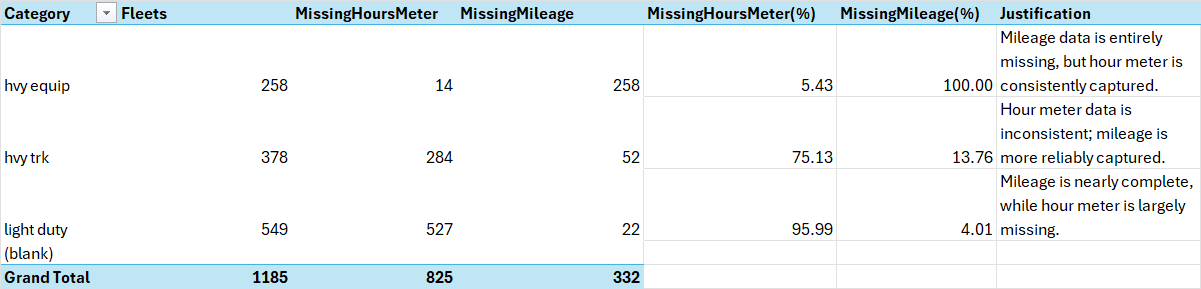


# We can also see that the majority of the heavy trucks and light-duty vehicles are measured in mileage. This makes sense because generally heavy trucks and light duty vehicles are measured in mileage. Sources: https://natural-resources.canada.ca/energy-efficiency/transportation-energy-efficiency/fuel-efficiency-benchmarking-canada-s-trucking-industry

https://natural-resources.canada.ca/energy-efficiency/transportation-energy-efficiency/understanding-fuel-consumption-ratings

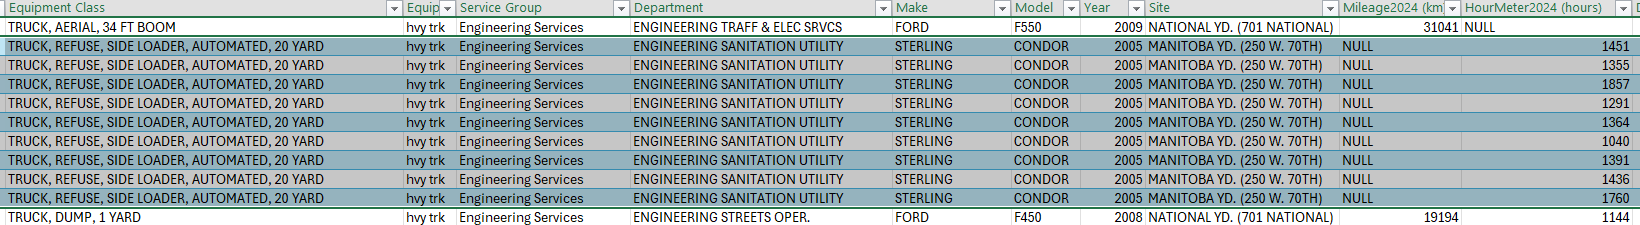



---
#It is also important to note that some of the heavy trucks are missing mileage information. Upon closer look, we can see that they contain proper hours meter informations.

#Thus, while heavy trucks are typically tracked using mileage, specific operational subgroups, like refuse loaders in sanitation, are tracked via hour meters due to their stop-and-idle work patterns. These are functional exceptions to the general categorization

#Therefore, utilization metrics of heavy trucks should be segregated into mileage and hours

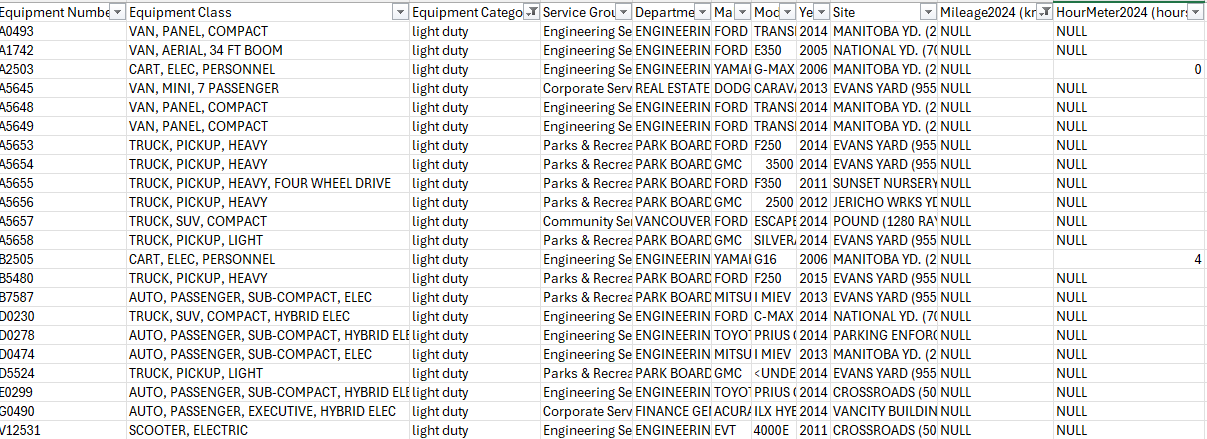

#Where as, light duty vehicles which are missing mileage are also missing hours meter information. So we can conclude that no light duty are being measured in hour meter



---
#Now, it's better to create a column where fleets primary metric is mentioned to avoid confusion.


In [156]:
df["Equipment Category"].unique()

array(['light duty', 'hvy equip', 'hvy trk'], dtype=object)

In [157]:
df.loc[df['Equipment Category'] == "hvy equip", "PrimaryMetric"] = "hours"

In [158]:
df.loc[df['Equipment Category'] == "hvy equip", "PrimaryMetric"].unique()

array(['hours'], dtype=object)

In [159]:
df.loc[df['Equipment Category'] == "light duty", "PrimaryMetric"] = "mileage"

In [160]:
df.loc[
       (df["Equipment Category"] == "hvy trk") &
          (
              (~df['Mileage2024 (km)'].isna()) |
                (
                    (df["HourMeter2024 (hours)"].isna()) & (df['Mileage2024 (km)'].isna())
                )
          ),
       "PrimaryMetric"
       ] = "mileage"

In [161]:
df.loc[(df['Equipment Category'] == "hvy trk") & (df['PrimaryMetric'].isna()), "PrimaryMetric"] = "hours"

In [162]:
df.loc[df['Equipment Category'] == "hvy trk", "PrimaryMetric"].unique()

array(['mileage', 'hours'], dtype=object)

In [163]:
df.head()

,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric
Equipment Number,,,,,,,,,,,,,
A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251,mileage
A0128,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING SEWERS OPER.,FORD,FOCUS,2002,MANITOBA YD. (250 W. 70TH),1607.0,NaN,29.510834,4.07029,mileage
A0129,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING SANITATION OPER.,MERCEDES,SMARTC,2008,MANITOBA YD. (250 W. 70TH),1323.0,NaN,4.696111,3.21806,mileage
A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750,mileage
A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277,mileage


#Since, fleets area being measured in mileage and hoursmeter as per equipment category. In order to handle missing values in hoursmeter and mileage, we will seperate df into two groups as per their primary metric.

In [164]:
df_hours = df.loc[df["PrimaryMetric"]=="hours"].copy()
df_mileage = df.loc[~(df["PrimaryMetric"]=="hours")].copy()

In [165]:
df_mileage["PrimaryMetric"].unique()

array(['mileage'], dtype=object)

In [166]:
len(df_hours)

261

In [167]:
len(df_mileage)

849

#First, lets handle "hoursmeter"

In [168]:
calculate_missingPercentage(df_hours)

Equipment Class                0.000000
Equipment Category             0.000000
Service Group                  0.000000
Department                     0.000000
Make                           0.000000
Model                          0.000000
Year                           0.000000
Site                           0.000000
Mileage2024 (km)             100.000000
HourMeter2024 (hours)          3.065134
DowntimeHours2024 (hours)      0.000000
LaborHours2024 (hours)         0.000000
PrimaryMetric                  0.000000
dtype: float64


#HourMeter is missing values<5%. We will check if missing values are randomly distributed among departments.

In [169]:
Dept_Proportion = df_hours['Department'].value_counts(normalize=True)
missing_hours = df_hours["HourMeter2024 (hours)"].isna()
Missing_Proportion = df_hours[missing_hours]["Department"].value_counts(normalize=True)
Missing_Proportion

,proportion
Department,
PARK BOARD VANCOUVER EAST DISTRICT,0.375
ENGINEERING TRANSFER AND LANDFILL OPER.,0.375
PARK BOARD PLANNING AND OPERATIONS,0.125
ENGINEERING SANITATION OPER.,0.125


In [170]:
def check_randomness_diff(Dept_Proportion, Missing_Proportion):
  Missing_Random_info = pd.concat([Dept_Proportion, Missing_Proportion], axis=1, keys = ["Full", "Missing"])
  Missing_Random_info["Missing"] = Missing_Random_info["Missing"].fillna(0)
  Missing_Random_info["Difference"] = Missing_Random_info["Full"] - Missing_Random_info["Missing"]
  Missing_Random_info.sort_values(by="Difference", inplace=True)
  return Missing_Random_info

In [171]:
Missing_Random_info = check_randomness_diff(Dept_Proportion, Missing_Proportion)
Missing_Random_info

,Full,Missing,Difference
Department,,,
ENGINEERING TRANSFER AND LANDFILL OPER.,0.088123,0.375,-0.286877
PARK BOARD VANCOUVER EAST DISTRICT,0.252874,0.375,-0.122126
ENGINEERING SANITATION OPER.,0.015326,0.125,-0.109674
PARK BOARD PLANNING AND OPERATIONS,0.022989,0.125,-0.102011
FACILITIES - TACTICAL TRAINING CENTRE,0.003831,0.000,0.003831
ENGINEERING KENT CONSTRUCTION S & S,0.007663,0.000,0.007663
CEMETERY,0.011494,0.000,0.011494
FINANCE CENTRAL STORES,0.011494,0.000,0.011494
ENGINEERING TRAFF & ELEC SRVCS,0.015326,0.000,0.015326


In [172]:
Missing_Random = Missing_Random_info.head(4).copy()
Missing_Random["Difference"] = Missing_Random['Difference'].abs()
Missing_Random

,Full,Missing,Difference
Department,,,
ENGINEERING TRANSFER AND LANDFILL OPER.,0.088123,0.375,0.286877
PARK BOARD VANCOUVER EAST DISTRICT,0.252874,0.375,0.122126
ENGINEERING SANITATION OPER.,0.015326,0.125,0.109674
PARK BOARD PLANNING AND OPERATIONS,0.022989,0.125,0.102011


#This means, all the four departments are missing more values than expected.

In [173]:
Total_missing = df_hours[missing_hours]["Department"].value_counts()
missing_counts = int(Total_missing.values.sum())
missing_counts

8

In [174]:
Missing_Random["Impute"] = (Missing_Random["Difference"]*missing_counts).round()
Missing_Random

,Full,Missing,Difference,Impute
Department,,,,
ENGINEERING TRANSFER AND LANDFILL OPER.,0.088123,0.375,0.286877,2.0
PARK BOARD VANCOUVER EAST DISTRICT,0.252874,0.375,0.122126,1.0
ENGINEERING SANITATION OPER.,0.015326,0.125,0.109674,1.0
PARK BOARD PLANNING AND OPERATIONS,0.022989,0.125,0.102011,1.0


In [175]:
Total_missing

,count
Department,
PARK BOARD VANCOUVER EAST DISTRICT,3
ENGINEERING TRANSFER AND LANDFILL OPER.,3
PARK BOARD PLANNING AND OPERATIONS,1
ENGINEERING SANITATION OPER.,1


In [176]:
df_missing_hours = df_hours[missing_hours]
df_missing_hours

,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric
Equipment Number,,,,,,,,,,,,,
a5664,"SWEEPER, MECHANICAL, VACUUM ASSIST, RIDE-ON, D...",hvy equip,Engineering Services,ENGINEERING SANITATION OPER.,RAVO,9900,2014,MANITOBA YD. (250 W. 70TH),NaN,NaN,722.873614,11.571390,hours
D7734,"TURF, MOWER, ROTARY, 16 FT, RIDE-ON",hvy equip,Parks & Recreation,PARK BOARD PLANNING AND OPERATIONS,TORO,5910,2014,JERICHO WRKS YD(N.FT.DISCOVRY),NaN,NaN,76.235555,19.625550,hours
A5659,"CONSTRUCTION, LOADER, 4-6 YARD, RUBBER",hvy equip,Engineering Services,ENGINEERING TRANSFER AND LANDFILL OPER.,CATERPILLAR,924K,2013,SOUTH SIDE TRANSFER STATION,NaN,NaN,113.833333,33.806980,hours
A5660,"CONSTRUCTION, BULLDOZER, 190 HP",hvy equip,Engineering Services,ENGINEERING TRANSFER AND LANDFILL OPER.,KOMATSU,D65PX-17,2013,DELTA LANDFILL,NaN,NaN,435.908611,145.370570,hours
A5661,"CONSTRUCTION, BULLDOZER, 300 HP",hvy equip,Engineering Services,ENGINEERING TRANSFER AND LANDFILL OPER.,KOMATSU,D155AX-7,2013,DELTA LANDFILL,NaN,NaN,111.115553,85.406950,hours
D7801,"TURF, VACUUM, TRAILER",hvy equip,Parks & Recreation,PARK BOARD VANCOUVER EAST DISTRICT,BROUWER,BV85,2011,SUNSET NURSERY (290 E. 51ST),NaN,NaN,84.297915,10.602085,hours
D7860,"TURF, VACUUM, TRAILER",hvy equip,Parks & Recreation,PARK BOARD VANCOUVER EAST DISTRICT,BROUWER,BV85,2011,JERICHO WRKS YD(N.FT.DISCOVRY),NaN,NaN,34.003889,7.186670,hours
D7864,"TURF, VACUUM, TRAILER",hvy equip,Parks & Recreation,PARK BOARD VANCOUVER EAST DISTRICT,BROUWER,BV85,2011,EVANS YARD (955 EVANS AVE.),NaN,NaN,134.591942,14.017500,hours


#Manually choosing rows that needs to be removed from each department.

In [177]:
records_to_remove = ["A5659", "D7801", "D7860"]

In [178]:
len(df_hours)

261

In [179]:
df_hours.drop(index=records_to_remove, inplace=True)

In [180]:
len(df_hours)

258

In [181]:
records_to_impute = df_hours.loc[df_hours['HourMeter2024 (hours)'].isna()].copy()
records_to_impute.head()

,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric
Equipment Number,,,,,,,,,,,,,
a5664,"SWEEPER, MECHANICAL, VACUUM ASSIST, RIDE-ON, D...",hvy equip,Engineering Services,ENGINEERING SANITATION OPER.,RAVO,9900,2014,MANITOBA YD. (250 W. 70TH),NaN,NaN,722.873614,11.57139,hours
D7734,"TURF, MOWER, ROTARY, 16 FT, RIDE-ON",hvy equip,Parks & Recreation,PARK BOARD PLANNING AND OPERATIONS,TORO,5910,2014,JERICHO WRKS YD(N.FT.DISCOVRY),NaN,NaN,76.235555,19.62555,hours
A5660,"CONSTRUCTION, BULLDOZER, 190 HP",hvy equip,Engineering Services,ENGINEERING TRANSFER AND LANDFILL OPER.,KOMATSU,D65PX-17,2013,DELTA LANDFILL,NaN,NaN,435.908611,145.37057,hours
A5661,"CONSTRUCTION, BULLDOZER, 300 HP",hvy equip,Engineering Services,ENGINEERING TRANSFER AND LANDFILL OPER.,KOMATSU,D155AX-7,2013,DELTA LANDFILL,NaN,NaN,111.115553,85.40695,hours
D7864,"TURF, VACUUM, TRAILER",hvy equip,Parks & Recreation,PARK BOARD VANCOUVER EAST DISTRICT,BROUWER,BV85,2011,EVANS YARD (955 EVANS AVE.),NaN,NaN,134.591942,14.01750,hours


In [182]:
len(records_to_impute)

5

In [183]:
df_imputed_records.head()

,Equipment Number,Downtime_LabourHours_Imputed
0,A0006,0
1,A0128,0
2,A0129,0
3,A0131,0
4,A0149,0


In [184]:
df_imputed_records["HoursMeter_Imputed"] = df_imputed_records["Equipment Number"].isin(records_to_impute.index.tolist()).astype(int)
df_imputed_records.head()

,Equipment Number,Downtime_LabourHours_Imputed,HoursMeter_Imputed
0,A0006,0,0
1,A0128,0,0
2,A0129,0,0
3,A0131,0,0
4,A0149,0,0


In [185]:
df_imputed_records.loc[df_imputed_records["HoursMeter_Imputed"] == 1]

,Equipment Number,Downtime_LabourHours_Imputed,HoursMeter_Imputed
159,A5660,1,1
160,A5661,0,1
162,a5664,0,1
1083,D7734,0,1
1099,D7864,0,1


#Now, its time to impute hours meter null values

In [186]:
calculate_missingPercentage(df_hours)

Equipment Class                0.000000
Equipment Category             0.000000
Service Group                  0.000000
Department                     0.000000
Make                           0.000000
Model                          0.000000
Year                           0.000000
Site                           0.000000
Mileage2024 (km)             100.000000
HourMeter2024 (hours)          1.937984
DowntimeHours2024 (hours)      0.000000
LaborHours2024 (hours)         0.000000
PrimaryMetric                  0.000000
dtype: float64


In [187]:
groupWRT = [["Equipment Category", "Service Group", "Department", "Equipment Class", "Make", "Model", "Year"],
            ["Equipment Category", "Service Group", "Department", "Equipment Class", "Make", "Model"],
            ["Equipment Category", "Service Group", "Department", "Equipment Class", "Make"],
            ["Equipment Category", "Service Group", "Department", "Equipment Class"],
            ["Equipment Category", "Service Group", "Department"],
            ["Equipment Category", "Service Group"],
            ["Equipment Category"]]

for group in groupWRT:
  df_hours["HourMeter2024 (hours)"] = df_hours.groupby(group)["HourMeter2024 (hours)"].transform(lambda x: x.fillna(x.median()))


In [188]:
calculate_missingPercentage(df_hours)

Equipment Class                0.0
Equipment Category             0.0
Service Group                  0.0
Department                     0.0
Make                           0.0
Model                          0.0
Year                           0.0
Site                           0.0
Mileage2024 (km)             100.0
HourMeter2024 (hours)          0.0
DowntimeHours2024 (hours)      0.0
LaborHours2024 (hours)         0.0
PrimaryMetric                  0.0
dtype: float64


#Now, its time to fix the mileage

In [189]:
calculate_missingPercentage(df_mileage)

Equipment Class               0.000000
Equipment Category            0.000000
Service Group                 0.000000
Department                    0.000000
Make                          0.000000
Model                         0.000000
Year                          0.000000
Site                          0.000000
Mileage2024 (km)              3.415783
HourMeter2024 (hours)        91.166078
DowntimeHours2024 (hours)     0.000000
LaborHours2024 (hours)        0.000000
PrimaryMetric                 0.000000
dtype: float64


In [190]:
Dept_Proportion = df_mileage['Department'].value_counts(normalize=True)
missing_hours = df_mileage["Mileage2024 (km)"].isna()
Missing_Proportion = df_mileage[missing_hours]["Department"].value_counts(normalize=True)
Missing_Proportion

,proportion
Department,
ENGINEERING SANITATION OPER.,0.172414
ENGINEERING SANITATION UTILITY,0.137931
PARK BOARD QUEEN ELIZABETH DISTRICT,0.137931
ENGINEERING SEWERS OPER.,0.137931
ENGINEERING TRAFF & ELEC SRVCS,0.068966
ENGINEERING EQUIPMENT OPER.,0.068966
PARK BOARD STANLEY DISTRICT,0.034483
REAL ESTATE & FACILITIES MANAGEMENT,0.034483
ENGINEERING YARDS,0.034483


In [191]:
Missing_Random_info = check_randomness_diff(Dept_Proportion, Missing_Proportion)
Missing_Random_info

,Full,Missing,Difference
Department,,,
ENGINEERING SANITATION OPER.,0.053004,0.172414,-0.119410
ENGINEERING SANITATION UTILITY,0.043581,0.137931,-0.094350
PARK BOARD QUEEN ELIZABETH DISTRICT,0.054181,0.137931,-0.083750
ENGINEERING SEWERS OPER.,0.082450,0.137931,-0.055481
ENGINEERING EQUIPMENT OPER.,0.028269,0.068966,-0.040697
ENGINEERING YARDS,0.001178,0.034483,-0.033305
FINANCE GENERAL MANAGER'S OFFICE,0.001178,0.034483,-0.033305
ENGINEERING PROJECTS,0.010601,0.034483,-0.023882
PARK BOARD STANLEY DISTRICT,0.027091,0.034483,-0.007392


In [192]:
not_missing_in_random = Missing_Random_info.head(5).copy()
not_missing_in_random

,Full,Missing,Difference
Department,,,
ENGINEERING SANITATION OPER.,0.053004,0.172414,-0.119410
ENGINEERING SANITATION UTILITY,0.043581,0.137931,-0.094350
PARK BOARD QUEEN ELIZABETH DISTRICT,0.054181,0.137931,-0.083750
ENGINEERING SEWERS OPER.,0.082450,0.137931,-0.055481
ENGINEERING EQUIPMENT OPER.,0.028269,0.068966,-0.040697


#we will seperate these departments with the rest.

In [193]:
imputedColumns = not_missing_in_random.index.tolist()
imputedColumns

['ENGINEERING SANITATION OPER.',
 'ENGINEERING SANITATION UTILITY',
 'PARK BOARD QUEEN ELIZABETH DISTRICT',
 'ENGINEERING SEWERS OPER.',
 'ENGINEERING EQUIPMENT OPER.']

In [194]:
df_mileage_drop_na = df_mileage.loc[~(df_mileage['Department'].isin(imputedColumns))]
df_mileage_impute = df_mileage.loc[df_mileage['Department'].isin(imputedColumns)]
df_mileage_impute["Department"].unique()

array(['ENGINEERING SEWERS OPER.', 'ENGINEERING SANITATION OPER.',
       'ENGINEERING SANITATION UTILITY', 'ENGINEERING EQUIPMENT OPER.',
       'PARK BOARD QUEEN ELIZABETH DISTRICT'], dtype=object)

In [195]:
calculate_missingPercentage(df_mileage_drop_na)

Equipment Class               0.000000
Equipment Category            0.000000
Service Group                 0.000000
Department                    0.000000
Make                          0.000000
Model                         0.000000
Year                          0.000000
Site                          0.000000
Mileage2024 (km)              1.594896
HourMeter2024 (hours)        90.590112
DowntimeHours2024 (hours)     0.000000
LaborHours2024 (hours)        0.000000
PrimaryMetric                 0.000000
dtype: float64


In [196]:
df_mileage_drop_na = df_mileage_drop_na.dropna(subset=["Mileage2024 (km)"])
df_mileage_drop_na.head()

,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric
Equipment Number,,,,,,,,,,,,,
A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251,mileage
A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750,mileage
A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277,mileage
A0152,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,FORD,FOCUS,2008,NATIONAL YD. (701 NATIONAL),11908.0,NaN,8.823056,6.12665,mileage
A0153,"AUTO, PASSENGER, COMPACT",light duty,Engineering Services,ENGINEERING PROJECTS,FORD,FOCUS,2008,CROSSROADS (507 W. BROADWAY),8114.0,NaN,20.933889,7.35584,mileage


In [197]:
calculate_missingPercentage(df_mileage_drop_na)

Equipment Class               0.000000
Equipment Category            0.000000
Service Group                 0.000000
Department                    0.000000
Make                          0.000000
Model                         0.000000
Year                          0.000000
Site                          0.000000
Mileage2024 (km)              0.000000
HourMeter2024 (hours)        90.599676
DowntimeHours2024 (hours)     0.000000
LaborHours2024 (hours)        0.000000
PrimaryMetric                 0.000000
dtype: float64


#remove excess missing values in imputing departments

In [198]:
len(df_mileage_impute)

222

In [199]:
total_missing_records = df_mileage_impute.loc[df_mileage_impute["Mileage2024 (km)"].isna()]
Total_no_missing_records = len(total_missing_records)
Total_no_missing_records

19

In [200]:
not_missing_in_random["ExpectedMissingCount"] = (not_missing_in_random["Full"]*Total_no_missing_records).round().astype(int)
not_missing_in_random

,Full,Missing,Difference,ExpectedMissingCount
Department,,,,
ENGINEERING SANITATION OPER.,0.053004,0.172414,-0.119410,1
ENGINEERING SANITATION UTILITY,0.043581,0.137931,-0.094350,1
PARK BOARD QUEEN ELIZABETH DISTRICT,0.054181,0.137931,-0.083750,1
ENGINEERING SEWERS OPER.,0.082450,0.137931,-0.055481,2
ENGINEERING EQUIPMENT OPER.,0.028269,0.068966,-0.040697,1


In [201]:
actual_missing_rows = total_missing_records["Department"].value_counts()
not_missing_in_random["ActualMissingCount"] = actual_missing_rows
not_missing_in_random["ImputedMissingCount"] = not_missing_in_random["ActualMissingCount"] - not_missing_in_random["ExpectedMissingCount"]
not_missing_in_random

,Full,Missing,Difference,ExpectedMissingCount,ActualMissingCount,ImputedMissingCount
Department,,,,,,
ENGINEERING SANITATION OPER.,0.053004,0.172414,-0.119410,1,5,4
ENGINEERING SANITATION UTILITY,0.043581,0.137931,-0.094350,1,4,3
PARK BOARD QUEEN ELIZABETH DISTRICT,0.054181,0.137931,-0.083750,1,4,3
ENGINEERING SEWERS OPER.,0.082450,0.137931,-0.055481,2,4,2
ENGINEERING EQUIPMENT OPER.,0.028269,0.068966,-0.040697,1,2,1


In [202]:
drop_indices = []

for index, row in not_missing_in_random.iterrows():
  Department = index
  n_toDelete = int(row["ExpectedMissingCount"])

  candidates = total_missing_records.loc[total_missing_records["Department"] == Department]
  selected_candidates = candidates.sample(n_toDelete, random_state=42).index
  drop_indices.extend(selected_candidates)

In [203]:
drop_indices

['B1895', 'A1532', 'A5655', 'A5648', 'D1333', 'D0474']

In [204]:
df_mileage_impute = df_mileage_impute.drop(index=drop_indices)

In [205]:
len(df_mileage_impute)

216

In [206]:
impute_mileage = df_mileage_impute.loc[df_mileage_impute["Mileage2024 (km)"].isna()]
len(impute_mileage)

13


#Recording the mileage that are being imputed

In [207]:
df_imputed_records.head()

,Equipment Number,Downtime_LabourHours_Imputed,HoursMeter_Imputed
0,A0006,0,0
1,A0128,0,0
2,A0129,0,0
3,A0131,0,0
4,A0149,0,0


In [208]:
df_imputed_records["Mileage_Imputed"] = df_imputed_records['Equipment Number'].isin(impute_mileage.index.to_list()).astype(int)
df_imputed_records.loc[df_imputed_records["Mileage_Imputed"]==1]

,Equipment Number,Downtime_LabourHours_Imputed,HoursMeter_Imputed,Mileage_Imputed
54,A1531,0,0,1
56,A1533,0,0,1
57,A1534,0,0,1
147,A5643,0,0,1
148,A5644,0,0,1
151,A5649,0,0,1
155,A5656,1,0,1
157,A5658,1,0,1
301,B1894,0,0,1
347,B2505,0,0,1


#Now we will merge the df_mileage_impute and df_mileage_drop_na before imputation

In [209]:
df_mileage = pd.concat([df_mileage_drop_na,df_mileage_impute], axis=0)
df_mileage.head()

,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric
Equipment Number,,,,,,,,,,,,,
A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251,mileage
A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750,mileage
A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277,mileage
A0152,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,FORD,FOCUS,2008,NATIONAL YD. (701 NATIONAL),11908.0,NaN,8.823056,6.12665,mileage
A0153,"AUTO, PASSENGER, COMPACT",light duty,Engineering Services,ENGINEERING PROJECTS,FORD,FOCUS,2008,CROSSROADS (507 W. BROADWAY),8114.0,NaN,20.933889,7.35584,mileage


In [210]:
len(df_mileage)

833

In [211]:
calculate_missingPercentage(df_mileage)

Equipment Class               0.000000
Equipment Category            0.000000
Service Group                 0.000000
Department                    0.000000
Make                          0.000000
Model                         0.000000
Year                          0.000000
Site                          0.000000
Mileage2024 (km)              1.560624
HourMeter2024 (hours)        91.116447
DowntimeHours2024 (hours)     0.000000
LaborHours2024 (hours)        0.000000
PrimaryMetric                 0.000000
dtype: float64


In [212]:
groupWRT = [["Equipment Category", "Service Group", "Department", "Equipment Class", "Make", "Model", "Year"],
            ["Equipment Category", "Service Group", "Department", "Equipment Class", "Make", "Model"],
            ["Equipment Category", "Service Group", "Department", "Equipment Class", "Make"],
            ["Equipment Category", "Service Group", "Department", "Equipment Class"],
            ["Equipment Category", "Service Group", "Department"],
            ["Equipment Category", "Service Group"],
            ["Equipment Category"]]

for group in groupWRT:
  df_mileage["Mileage2024 (km)"] = df_mileage.groupby(group)["Mileage2024 (km)"].transform(lambda x: x.fillna(x.median()))

In [213]:
calculate_missingPercentage(df_mileage)

Equipment Class               0.000000
Equipment Category            0.000000
Service Group                 0.000000
Department                    0.000000
Make                          0.000000
Model                         0.000000
Year                          0.000000
Site                          0.000000
Mileage2024 (km)              0.000000
HourMeter2024 (hours)        91.116447
DowntimeHours2024 (hours)     0.000000
LaborHours2024 (hours)        0.000000
PrimaryMetric                 0.000000
dtype: float64


#Now, lets combine df_mileage and df_hours

In [214]:
df = pd.concat([df_mileage,df_hours], axis=0)

In [215]:
len(df)

1091

In [216]:
calculate_missingPercentage(df)

Equipment Class               0.000000
Equipment Category            0.000000
Service Group                 0.000000
Department                    0.000000
Make                          0.000000
Model                         0.000000
Year                          0.000000
Site                          0.000000
Mileage2024 (km)             23.648029
HourMeter2024 (hours)        69.569203
DowntimeHours2024 (hours)     0.000000
LaborHours2024 (hours)        0.000000
PrimaryMetric                 0.000000
dtype: float64


#Now we have successfully handled missing values. We can still see some null values in the mileage and the hour meter. But its records of those fleets whose utilization is measured in another way. For instance, heavy equipment is missing mileage because they are not measured in mileage, but in downtime. Similarly, some heavy trucks are missing mileage, but they have a proper hour meter, which means these trucks are being measured in hourmeter.  

#Noticed negative values in some column in excel. So lets analyze them

In [217]:
df.describe()

,Year,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours)
count,1091.000000,833.000000,332.000000,1091.000000,1091.000000
mean,2006.586618,9196.216687,522.028614,218.085861,62.455373
std,4.461719,7961.167093,513.371249,254.060884,93.182601
min,1982.000000,0.000000,-1181.000000,0.496111,0.001670
25%,2003.000000,4511.000000,121.750000,57.236806,12.956255
50%,2006.000000,7444.000000,378.000000,139.713332,30.133880
75%,2011.000000,11539.000000,819.500000,284.377358,64.795690
max,2014.000000,64500.000000,2990.000000,2629.310007,822.157860


In [218]:
df.loc[df["HourMeter2024 (hours)"] < 0]

,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric
Equipment Number,,,,,,,,,,,,,
B2308,"PAVING, ROLLER VIBRATING, TANDEM, 2 TON",hvy equip,Engineering Services,ENGINEERING STREETS OPER.,BOMAG,BW900-2,2007,NATIONAL YD. (701 NATIONAL),NaN,-105.0,127.488333,59.79613,hours
C1720,"TRUCK, AERIAL, 40 FT BOOM",hvy trk,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,FREIGHTLINER,FS-65,2006,NATIONAL YD. (701 NATIONAL),NaN,-1181.0,64.336389,24.11556,hours


#These negative values in hourmeter seem to be typo error

In [219]:
df['HourMeter2024 (hours)'] = df["HourMeter2024 (hours)"].abs()

In [220]:
df.describe()

,Year,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours)
count,1091.000000,833.000000,332.000000,1091.000000,1091.000000
mean,2006.586618,9196.216687,529.775602,218.085861,62.455373
std,4.461719,7961.167093,505.348501,254.060884,93.182601
min,1982.000000,0.000000,0.000000,0.496111,0.001670
25%,2003.000000,4511.000000,125.000000,57.236806,12.956255
50%,2006.000000,7444.000000,379.500000,139.713332,30.133880
75%,2011.000000,11539.000000,836.500000,284.377358,64.795690
max,2014.000000,64500.000000,2990.000000,2629.310007,822.157860


#Now the data has been cleaned. Lets save it.

In [226]:
from google.colab import files
df.to_csv("CleanedDataSet.csv")
files.download("CleanedDataSet.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>